In [24]:
import torch 
import torch.nn as nn
from torchvision.datasets import ImageFolder

In [25]:
# Importing the data
import os
device = "cuda" if torch.cuda.is_available() else "cpu"

# import data
img_path = "Dataset/data"

# show some data
for dirpath , dirname , filename in os.walk(img_path):
    print(f"There are {len(dirname)} dir and {len(filename)} images in '{dirpath}' ")

There are 2 dir and 0 images in 'Dataset/data' 
There are 2 dir and 0 images in 'Dataset/data\Task A' 
There are 2 dir and 0 images in 'Dataset/data\Task A\test' 
There are 0 dir and 206 images in 'Dataset/data\Task A\test\Gray_Leaf_Spot' 
There are 0 dir and 418 images in 'Dataset/data\Task A\test\Healthy' 
There are 2 dir and 0 images in 'Dataset/data\Task A\train' 
There are 0 dir and 368 images in 'Dataset/data\Task A\train\Gray_Leaf_Spot' 
There are 0 dir and 744 images in 'Dataset/data\Task A\train\Healthy' 
There are 2 dir and 0 images in 'Dataset/data\Task B' 
There are 2 dir and 0 images in 'Dataset/data\Task B\test' 
There are 0 dir and 412 images in 'Dataset/data\Task B\test\Blight' 
There are 0 dir and 470 images in 'Dataset/data\Task B\test\Common_Rust' 
There are 2 dir and 0 images in 'Dataset/data\Task B\train' 
There are 0 dir and 734 images in 'Dataset/data\Task B\train\Blight' 
There are 0 dir and 836 images in 'Dataset/data\Task B\train\Common_Rust' 


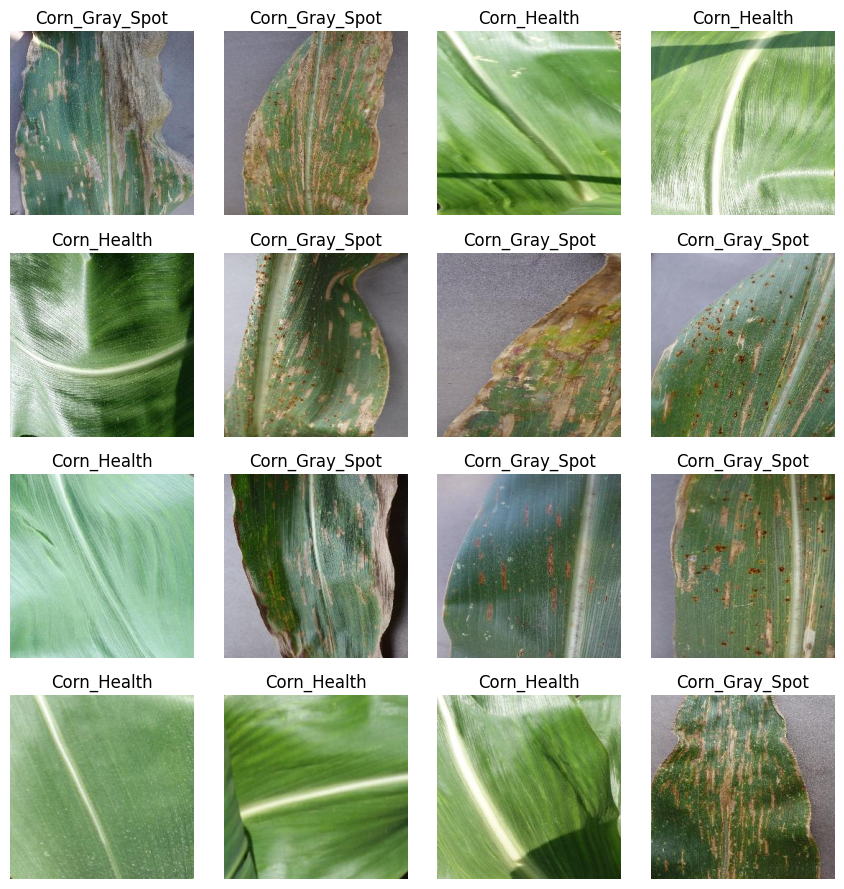

In [26]:
# Visulise some data for task A
import matplotlib.pyplot as plt
import random
import cv2

random.seed(42)

img_path_task_a = "Dataset/data/Task A/train"
fig = plt.figure(figsize= ( 9 , 9))
col  , row = 4 , 4
import glob
 
img_cls = random.sample(list(glob.glob(img_path_task_a+ "*/*/*.jpg")) , k = row*col)
for i in range(0 , row*col):
     
     img = cv2.imread(img_cls[i])
     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
     
     plt.subplot(row , col , i+1)
     plt.title(img_cls[i].split("\\")[3].split(" ")[0])
     plt.imshow(img)
     plt.axis(False)
     plt.tight_layout()

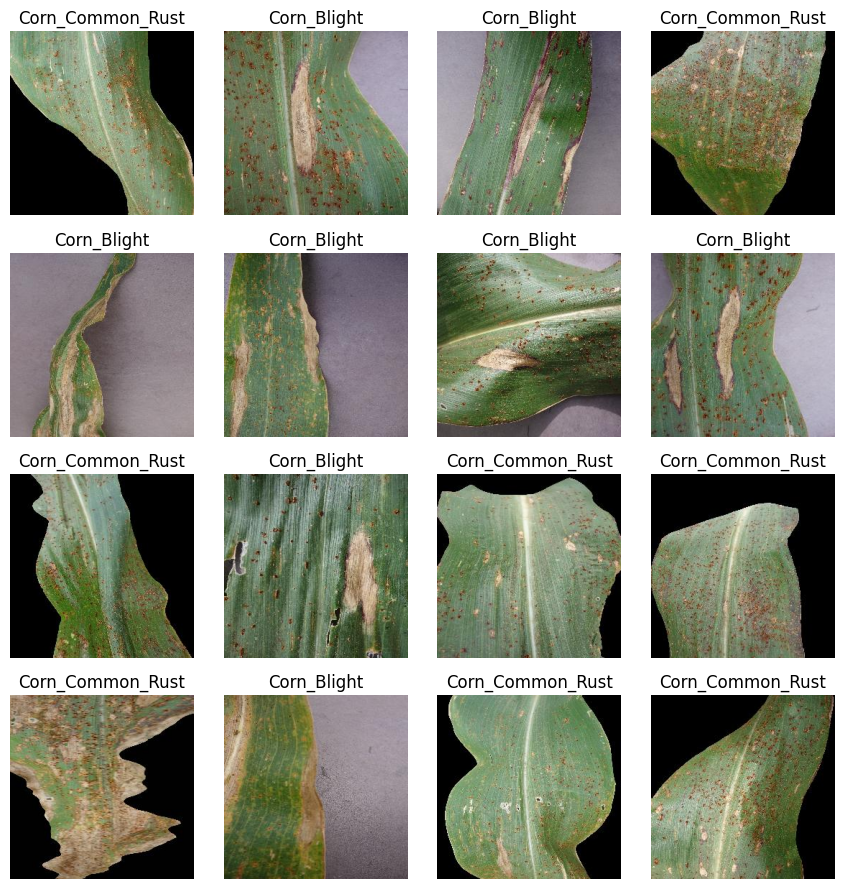

In [27]:
# Visulise some data for task B
import matplotlib.pyplot as plt
import random
import cv2

random.seed(42)

img_path_task_a = "Dataset/data/Task B/train"
fig = plt.figure(figsize= ( 9 , 9))
col  , row = 4 , 4
import glob
 
img_cls = random.sample(list(glob.glob(img_path_task_a+ "*/*/*.jpg")) , k = row*col)
for i in range(0 , row*col):
     
     img = cv2.imread(img_cls[i])
     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
     
     plt.subplot(row , col , i+1)
     plt.title(img_cls[i].split("\\")[3].split(" ")[0])
     plt.imshow(img)
     plt.axis(False)
     plt.tight_layout()

In [28]:
from torch.utils.data import DataLoader , Dataset
from torchvision import datasets , transforms

# setup train and test datafolder 
train_dir_task_a = "Dataset/data/Task A/train"
test_dir_task_a = "Dataset/data/Task A/test"

# making image transforms
data_transform = transforms.Compose([
  transforms.Resize(size=(224, 224)),
  transforms.RandomHorizontalFlip(p=0.5),
  transforms.ToTensor() ,
  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229,
0.224, 0.225])
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 1000x1000 with 0 Axes>

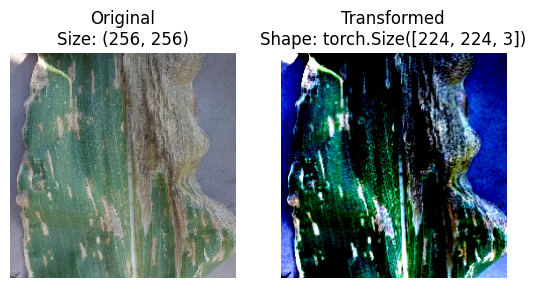

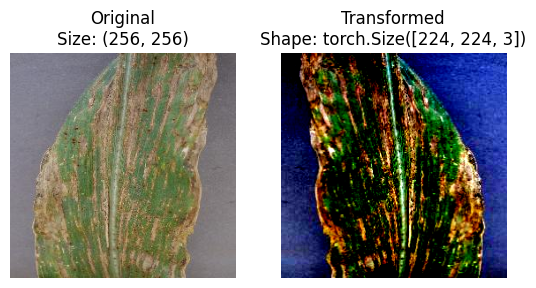

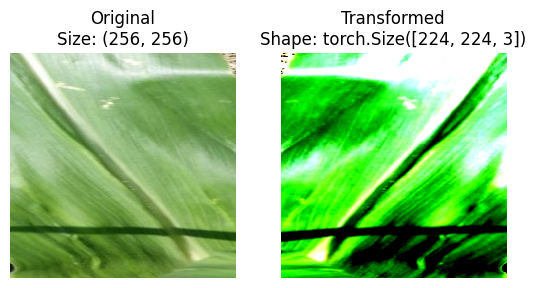

In [29]:
# Visualise the transfromation
from PIL import Image
def transform_and_visualise_img(img_path , transform , n = 3):
    random.seed(42)
    fig = plt.figure(figsize=(10 , 10))
    random_path = random.sample(list(glob.glob(img_path+ "*/*/*.jpg")) , k = n)
    for img_ in random_path:
        with Image.open(img_) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            # Transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0) # note we will need to change shape for matplotlib (C, H, W) -> (H, W, C)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis("off")
            
transform_and_visualise_img(img_path= train_dir_task_a , transform= data_transform)
    

In [30]:
# Loding data from folders
from torchvision import datasets
train_data_task_a = datasets.ImageFolder(root= train_dir_task_a,
                                         transform= data_transform,
                                         target_transform= None)

test_data_task_a = datasets.ImageFolder(root=test_dir_task_a ,
                                        transform= data_transform,
                                        target_transform= None)

In [31]:
train_data_task_a , test_data_task_a

(Dataset ImageFolder
     Number of datapoints: 1112
     Root location: Dataset/data/Task A/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 Dataset ImageFolder
     Number of datapoints: 624
     Root location: Dataset/data/Task A/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ))

In [32]:
# Traning data Task A

print(f"we have classes {train_data_task_a.classes}")
label_class = train_data_task_a.class_to_idx
label_class = {v:k for k , v in label_class.items()}
print(train_data_task_a.class_to_idx)
print(f"The lengh of the dataset is : {len(train_data_task_a)}")

we have classes ['Gray_Leaf_Spot', 'Healthy']
{'Gray_Leaf_Spot': 0, 'Healthy': 1}
The lengh of the dataset is : 1112


In [33]:
# Hyperparamaters 
lr = 0.01
BATCH_SIZE = 8
epochs = 10

In [34]:
# making dataloders 
train_dataloader_task_a = DataLoader(dataset=train_data_task_a,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader_task_a = DataLoader(dataset=test_data_task_a,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader_task_a, train_dataloader_task_a

(<torch.utils.data.dataloader.DataLoader at 0x26c4ed6ba10>,
 <torch.utils.data.dataloader.DataLoader at 0x26c4ed6ba10>)

In [35]:
len(train_dataloader_task_a) , len(train_data_task_a)/8

(139, 139.0)

In [36]:
from torchvision import datasets, transforms, models
model = models.resnet50(pretrained=True)

c:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [37]:
# from torchvision import datasets, transforms, models
# model = models.mobilenet_v3_small(pretrained=True)


In [38]:
from torchinfo import summary
summary(model , input_size=(8 , 3, 224 , 224))

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [8, 1000]                 --
├─Conv2d: 1-1                            [8, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [8, 64, 112, 112]         128
├─ReLU: 1-3                              [8, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [8, 64, 56, 56]           --
├─Sequential: 1-5                        [8, 256, 56, 56]          --
│    └─Bottleneck: 2-1                   [8, 256, 56, 56]          --
│    │    └─Conv2d: 3-1                  [8, 64, 56, 56]           4,096
│    │    └─BatchNorm2d: 3-2             [8, 64, 56, 56]           128
│    │    └─ReLU: 3-3                    [8, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [8, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-5             [8, 64, 56, 56]           128
│    │    └─ReLU: 3-6                    [8, 64, 56, 56]           --
│ 

In [39]:
#  Modify the classifier to match the number of classes
num_classes = len(train_data_task_a.classes)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, num_classes)

In [40]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [42]:
import torch.optim.optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params= model.parameters(), lr = lr ,weight_decay= 1e-7 )

In [43]:
for d , l in train_dataloader_task_a:
    print(d.shape) # shape of img data
    print(l.shape) # shape of label
    break

torch.Size([8, 3, 224, 224])
torch.Size([8])


In [44]:
# Accuracy function
def accuarcy_cal(y_true , y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = correct/len(y_pred)
    return acc*100

In [45]:
# Function to Train the model
def training_step(model: torch.nn.Module,
                  train_dataloder : torch.utils.data.DataLoader,
                  loss_function : torch.nn.Module,
                  opt: torch.nn.Module,
                  accuarcy_cal,
                  fisher_matrix = None,
                  old_params = None,
                  lambda_ewc = 1000.0, 
                  device: torch.device = device):
    batch_loss = 0
    traning_acc = 0
    for batch , (batch_feature , batch_label) in enumerate(train_dataloder):
        
        # Model in Traning Mode
        model.train()
        
        # Move to device
        batch_feature , batch_label = batch_feature.to(device) , batch_label.to(device)
        
        # forward 
        y_pred = model(batch_feature) 
        
        # Loss calculation
    
        loss = loss_function(y_pred , batch_label)
        
        
        # for Ewc Loss
        if fisher_matrix and old_params:
            loss += EWCLoss(model , fisher_matrix , old_params , lambda_ewc)
            # print(EWCLoss(model , fisher_matrix , old_params , lambda_ewc))
        
        # loss and accuracy Update
        acc = accuarcy_cal(y_true=batch_label , y_pred= torch.argmax(y_pred , dim = 1))
        traning_acc += acc
        
        
        # Backward 
        opt.zero_grad() 
        loss.backward()
        
        # Weight updates
        opt.step()
        
        # Loss update
        batch_loss += loss
        
    traning_acc /= len(train_dataloder)
    batch_loss /= len(train_dataloder)
    
    return traning_acc , batch_loss
    # print(f"Traning Loss : {batch_loss} , Traning Acc : {traning_acc}")

In [46]:
# function to for model testing
def testing_step(model: torch.nn.Module,
                  test_dataloder : torch.utils.data.DataLoader,
                  loss_function : torch.nn.Module,
                  accuarcy_cal,
                  device: torch.device = device):
    test_loss, test_acc = 0 , 0
    model.eval()
    with torch.inference_mode():
        for batch_feature , batch_label in test_dataloder:
            
            # for GPU
            batch_feature , batch_label = batch_feature.to(device) , batch_label.to(device)
            
            # Forward pass   
            y_pred = model(batch_feature)
            
            # loss caculation
            # batch_label = batch_label.to(dtype = torch.float32)
            test_loss += loss_function(y_pred , batch_label)
            
            # Calculate accuracy
            
            test_acc += accuarcy_cal(y_true= batch_label , y_pred= torch.argmax(y_pred , dim= 1))
        
        test_loss /= len(test_dataloder)
        test_acc /= len(test_dataloder)
    
    return test_acc , test_loss
    # print(f"Test Loss : {test_loss}, Test accuracy : {test_acc}")

In [48]:
# traning the model for task A
from tqdm import tqdm
epochs=5
results_for_task_a = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

for epoch in tqdm(range(epochs)):
    train_acc, train_loss,  = training_step(model=model,
                                       train_dataloder=train_dataloader_task_a,
                                       loss_function=loss_fn,
                                       opt=optimizer,
                                       accuarcy_cal= accuarcy_cal,
                                       device=device)
    test_acc,test_loss = testing_step(model=model,
                                    test_dataloder=test_dataloader_task_a,
                                    loss_function=loss_fn,
                                    accuarcy_cal= accuarcy_cal,
                                    device=device)
    
    # 4. Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update results dictionary
    results_for_task_a["train_loss"].append(train_loss)
    results_for_task_a["train_acc"].append(train_acc)
    results_for_task_a["test_loss"].append(test_loss)
    results_for_task_a["test_acc"].append(test_acc)

  0%|          | 0/5 [00:33<?, ?it/s]


KeyboardInterrupt: 

In [50]:
# TO create fisher matrix ( Information tell us about how impotant a paramter is )
def compute_fisher_matrix(model, dataloader, loss_fn):
    model.eval()
    fisher_matrix = {n: torch.zeros_like(p) for n, p in model.named_parameters() if p.requires_grad}
    
    for inputs, labels in dataloader:
        model.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        
        for n, p in model.named_parameters():
            if p.grad is not None:
                fisher_matrix[n] += p.grad ** 2 / len(dataloader)  # Square to derivative to enhace effects also, normalise the values by dividing
    
    return fisher_matrix


def EWCLoss(model , fisher_matrix , old_param , lambda_ewc):
    reg_loss = 0.0  # init regularisation loss with zero
    for n , p in model.named_parameters():
        if p.requires_grad:
            reg_loss += torch.sum(fisher_matrix[n] *(p - old_param[n]) ** 2)
            
    return reg_loss * lambda_ewc  # lambda_ewc: Handle Plasticity and stability


In [51]:
temp = compute_fisher_matrix(model , train_dataloader_task_a , loss_fn)
old_params = {n: p.clone() for n, p in model.named_parameters() if p.requires_grad}
lw = EWCLoss(model , temp , old_params
             , lambda_ewc= 1000.0)

lw

tensor(0., grad_fn=<MulBackward0>)

In [54]:
fisher_matrix = {n: p.grad**2 for n, p in model.named_parameters() if p.requires_grad}


In [57]:
lw = EWCLoss(model , temp , old_params
             , lambda_ewc= 100.0)

In [58]:
lw

tensor(0., grad_fn=<MulBackward0>)